In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_datareader as pdr # One way to find stocks data/ Needs to be installed
from scipy.stats import skew, kurtosis 
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [6]:
stocks = ['BJ', 'NYMTM', 'AAL', 'DAL']
# Bj's Wholesale, New York Mortgage, American Airlines, Delta Airlines

indexes = ['^N225', 'COMP', 'DJT', 'SPX']
# Japan's Nikkei Index, Nasdaq, Dow Jones Transportation, S&P500

In [1]:
start = '2000-01-01'
end = '2019-12-31'

def fetch_stock(stock, data_source='yahoo', start=start, end=end):
    df = pdr.DataReader(stock, data_source=data_source, start=start, end=end)

    return df

In [4]:
n225 = fetch_stock('^n225')

In [5]:
n225.describe()
n225.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,19187.609375,18937.449219,18937.449219,19002.859375,0.0,19002.859375
2000-01-05,19003.509766,18221.820312,19003.509766,18542.550781,0.0,18542.550781
2000-01-06,18582.740234,18168.269531,18574.009766,18168.269531,0.0,18168.269531
2000-01-07,18285.730469,18068.099609,18194.050781,18193.410156,0.0,18193.410156
2000-01-11,18887.560547,18246.099609,18246.099609,18850.919922,0.0,18850.919922


In [16]:
# Conversion from JPN requires multiplying by value from Google pulled 4/2 11pm EST
n225['Price_USD'] = n225['Adj Close'].map(lambda x: x * 0.0093)

In [17]:
# The actual price is the Adjusted Close on that day
price = n225['Price_USD']

# We're going to use the log of price and difference for returns
ret = np.log(price).diff()
# Also drop NA values
ret = ret.dropna()

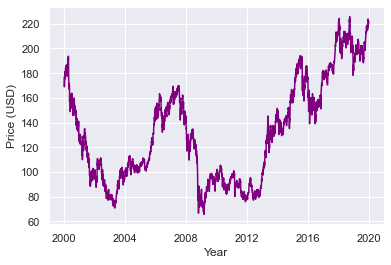

In [22]:
sns.set(style = 'darkgrid')
sns.lineplot(x = n225.index, y = price, data = n225, color = 'purple').set(xlabel = 'Year', ylabel = 'Price (USD)')
plt.show()

In 2004 and 2011 there were big Earthquakes in Japan. We can't really see the effect of these events in this graph unless we looked just at that year

In [34]:
# Let's do some simple stock stats for Returns
ret.mean() # Avg
ret.var() # Return Variance
ret.std() # Standard Deviation
skew(ret) # Skewness from SciPy
kurtosis(ret) # Kurtosis from SciPy

6.510262461812976

Next, we will plot the auto-correlation of the returns with the previous lags and see if there is any significant correlation that the returns have with the previous values.

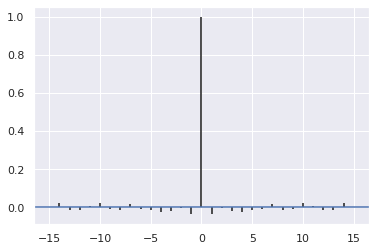

In [35]:
auto_corrplot = plt.acorr(ret, maxlags = 15)
plt.show(auto_corrplot)

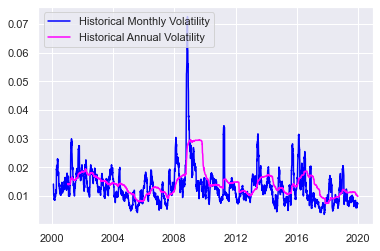

In [23]:
rolling_st = ret.rolling(window = 22).std()
rolling_st2 = ret.rolling(window = 252).std()
plt.plot(rolling_st, label='Historical Monthly Volatility', color='blue')
plt.plot(rolling_st2, label='Historical Annual Volatility', color='magenta')
plt.legend(loc='upper left')
plt.show()